In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print(tf.__version__)

2.6.2


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
fashion_mnist

<module 'keras.api._v2.keras.datasets.fashion_mnist' from 'C:\\Users\\Asus\\.conda\\envs\\deepl\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\fashion_mnist\\__init__.py'>

In [4]:
(train_images,train_labels), (test_images,test_labels) = fashion_mnist.load_data()

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
train_images[0]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [9]:
train_labels[0]

9

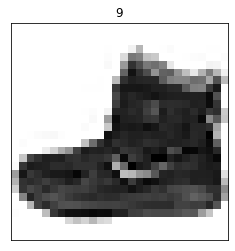

In [11]:
plt.imshow(train_images[0],cmap = "gray_r")
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title(train_labels[0])
plt.show()

In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [13]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [14]:
class_names[5]

'Sandal'

In [16]:
train_labels[123]

2

In [17]:
class_names[train_labels[123]]

'Pullover'

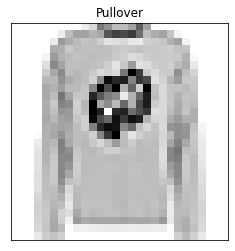

In [18]:
plt.imshow(train_images[123], cmap = "gray_r")
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title(class_names[train_labels[123]])
plt.show()

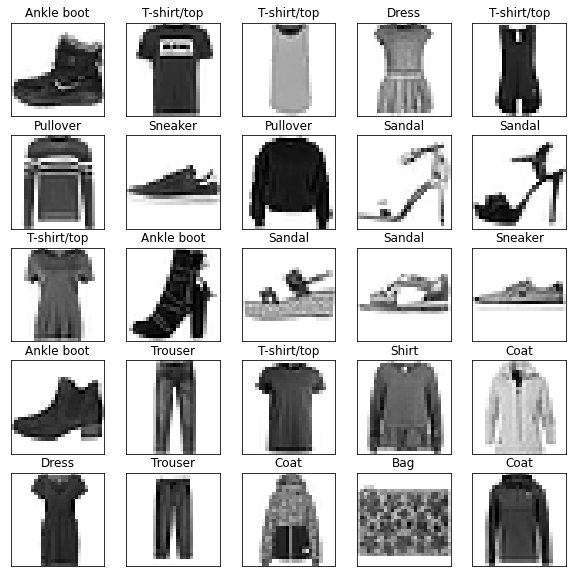

In [20]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title(class_names[train_labels[i]])
    plt.imshow(train_images[i],cmap=plt.cm.binary)
plt.show()

In [21]:
train_images = train_images/255.0
test_images = test_images/255.0

In [22]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [24]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(512,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [31]:
history = model.fit(train_images,train_labels,validation_split=0.2,epochs=40,verbose=1)

Epoch 1/40
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4953 - accuracy: 0.8230 - val_loss: 0.3977 - val_accuracy: 0.8547
Epoch 2/40
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3722 - accuracy: 0.8644 - val_loss: 0.3695 - val_accuracy: 0.8650
Epoch 3/40
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3306 - accuracy: 0.8773 - val_loss: 0.3774 - val_accuracy: 0.8627
Epoch 4/40
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3070 - accuracy: 0.8875 - val_loss: 0.3528 - val_accuracy: 0.8708
Epoch 5/40
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2850 - accuracy: 0.8937 - val_loss: 0.3347 - val_accuracy: 0.8789
Epoch 6/40
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2699 - accuracy: 0.8988 - val_loss: 0.3593 - val_accuracy: 0.8692
Epoch 7/40
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2561 - accuracy: 0.9047 - val_loss: 0.3098 - val_accuracy:

In [32]:
history.history

{'loss': [0.4953412413597107,
  0.37222298979759216,
  0.3306252658367157,
  0.30700981616973877,
  0.284962922334671,
  0.2699233293533325,
  0.25613081455230713,
  0.24347920715808868,
  0.23261211812496185,
  0.2239433377981186,
  0.21382786333560944,
  0.20592372119426727,
  0.19864878058433533,
  0.19077233970165253,
  0.18642014265060425,
  0.17728224396705627,
  0.1703738570213318,
  0.1655777245759964,
  0.159641832113266,
  0.1565825343132019,
  0.1493532657623291,
  0.14514440298080444,
  0.14190374314785004,
  0.13687710464000702,
  0.13426260650157928,
  0.1310792714357376,
  0.13103020191192627,
  0.12267506122589111,
  0.12053193151950836,
  0.11561068892478943,
  0.11122380942106247,
  0.11084192991256714,
  0.10935091972351074,
  0.10743822902441025,
  0.10211412608623505,
  0.10228592157363892,
  0.10008177906274796,
  0.09694111347198486,
  0.09093375504016876,
  0.0914401262998581],
 'accuracy': [0.8230416774749756,
  0.8644375205039978,
  0.8773333430290222,
  0.887

In [33]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

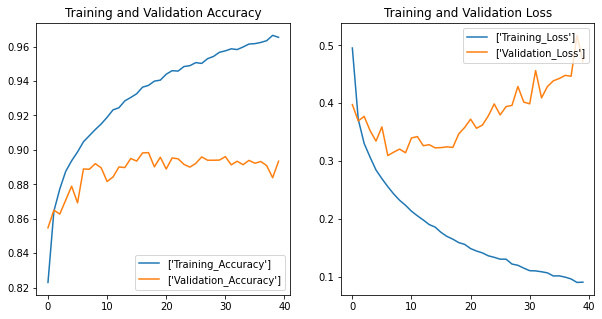

In [41]:
epochs =40
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs_range = range(epochs)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label=["Training_Accuracy"])
plt.plot(epochs_range, val_acc, label=["Validation_Accuracy"])
plt.legend(loc = "lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label=["Training_Loss"])
plt.plot(epochs_range, val_loss, label=["Validation_Loss"])
plt.legend(loc = "upper right")
plt.title("Training and Validation Loss")
plt.show()

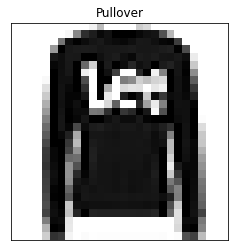

In [42]:
plt.imshow(test_images[1], cmap="gray_r")
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title(class_names[test_labels[1]])
plt.show()

In [43]:
test_images[1].shape

(28, 28)

In [44]:
model.predict(test_images[1].reshape(1,28,28))

array([[1.7319442e-08, 6.2235055e-27, 9.9992073e-01, 8.0582212e-24,
        7.8993784e-05, 3.1261395e-21, 2.5894630e-07, 0.0000000e+00,
        1.4595722e-24, 6.0700568e-31]], dtype=float32)

In [45]:
model.predict(test_images[1].reshape(1,28,28)).round(3)

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [46]:
np.argmax(model.predict(test_images[1].reshape(1,28,28)).round(3))

2

In [47]:
class_names[np.argmax(model.predict(test_images[1].reshape(1,28,28)).round(3))]

'Pullover'

# Early Stopping

In [48]:
model_new = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(512,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])

In [49]:
model_new.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
